In [7]:
import os
import tensorflow as tf
import numpy
from Brett import pipeline, data_util

### Hyperparameters

In [2]:
H = {
    'input_sigs': ['II', 'V', 'PLETH', 'RESP'],
    'max_sig_len': 125 * 60 * 60 * 24,
    'resp_scale': 5,
    'layer_count_a': 3,
    'layer_count_b': 5,
    'window_size': 512,
    'activation': 'relu',
    'dropout': 0.2,
    'filter_count': 128,
    'dense_units': 64,
    'kernel_size_a': 16,
    'stride_a': 4,
    'kernel_size_b': 4,
    'batch_size': 8,
    'batch_buffer_size': 2,
    'windows_per_record': 10,
    'optimizer': 'adam',
    'learning_rate': 3e-4,
    'pressure_smoothing_window': 300
}

### Initialize

In [8]:
tf.random.set_seed(7)
numpy.random.seed(7)

metadata, pressures = data_util.load_metadata_and_pressures(H)
data_util.describe_data_size(H, metadata)

126 GB,  33 years


In [10]:
rec_ids, indices, labels = data_util.sample_epoch(H, metadata, pressures, seed=7)
data = pipeline.build(H, rec_ids, indices, labels)

W0929 16:08:10.801256 139919928641280 deprecation.py:323] From /sailhome/kuprel/blood-pressure/env3p7/lib/python3.7/site-packages/tensorflow_core/python/data/util/random_seed.py:58: where (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [11]:
%%time

for x, y in data.take(10):
    print(
        'BATCH', 
        'x.shape:', x.shape, 'x.mean', x.numpy().mean(),
        'y.shape:', y.shape, 'y.mean', y.numpy().mean(0)
    )

reading record (3189000, 10)
reading record (3987729, 11)
reading record (3334855, 805)
reading record (3357886, 729)
reading record (3472281, 1342)
reading record (3634613, 326)
reading record (3188162, 114)
reading record (3847123, 2)
reading record (3337231, 320)
reading record (3238368, 8)
reading record (3472281, 557)
reading record (3592919, 84)
reading record (3634613, 332)
reading record (3174440, 298)
reading record (3235690, 364)
reading record (3472281, 1575)
reading record (3560856, 12)
reading record (3278208, 46)
reading record (3703802, 46)
reading record (3033031, 1025)
reading record (3075349, 93)
reading record (3672120, 101)
reading record (3237692, 40)
reading record (3552166, 58)
reading record (3722105, 12)
reading record (3310410, 32)
reading record (3268088, 207)
reading record (3423158, 158)
reading record (3334178, 40)
reading record (3569158, 3)
reading record (3787836, 29)
reading record (3205537, 10)
reading record (3633081, 19)
reading record (3032690, 17)

### Plot Waves from Last Generated Batch

In [16]:
%matplotlib notebook
from matplotlib import pyplot

def plot_waves(x):
    pyplot.subplots_adjust(wspace=0, hspace=0)
    for i, sig in enumerate(H['input_sigs']):
        ax = pyplot.subplot(len(H['input_sigs']), 1, i + 1)
        ax.plot(x[:, i])
        ax.set_ylabel(sig)
        ax.yaxis.tick_right()

def plot_batch_example(x, y, i):
    fig = pyplot.figure()
    plot_waves(x[i])
    fig.axes[0].set_title('Systolic: %.1f, Diastolic: %.1f' % tuple(y[i].numpy()))

<IPython.core.display.Javascript object>


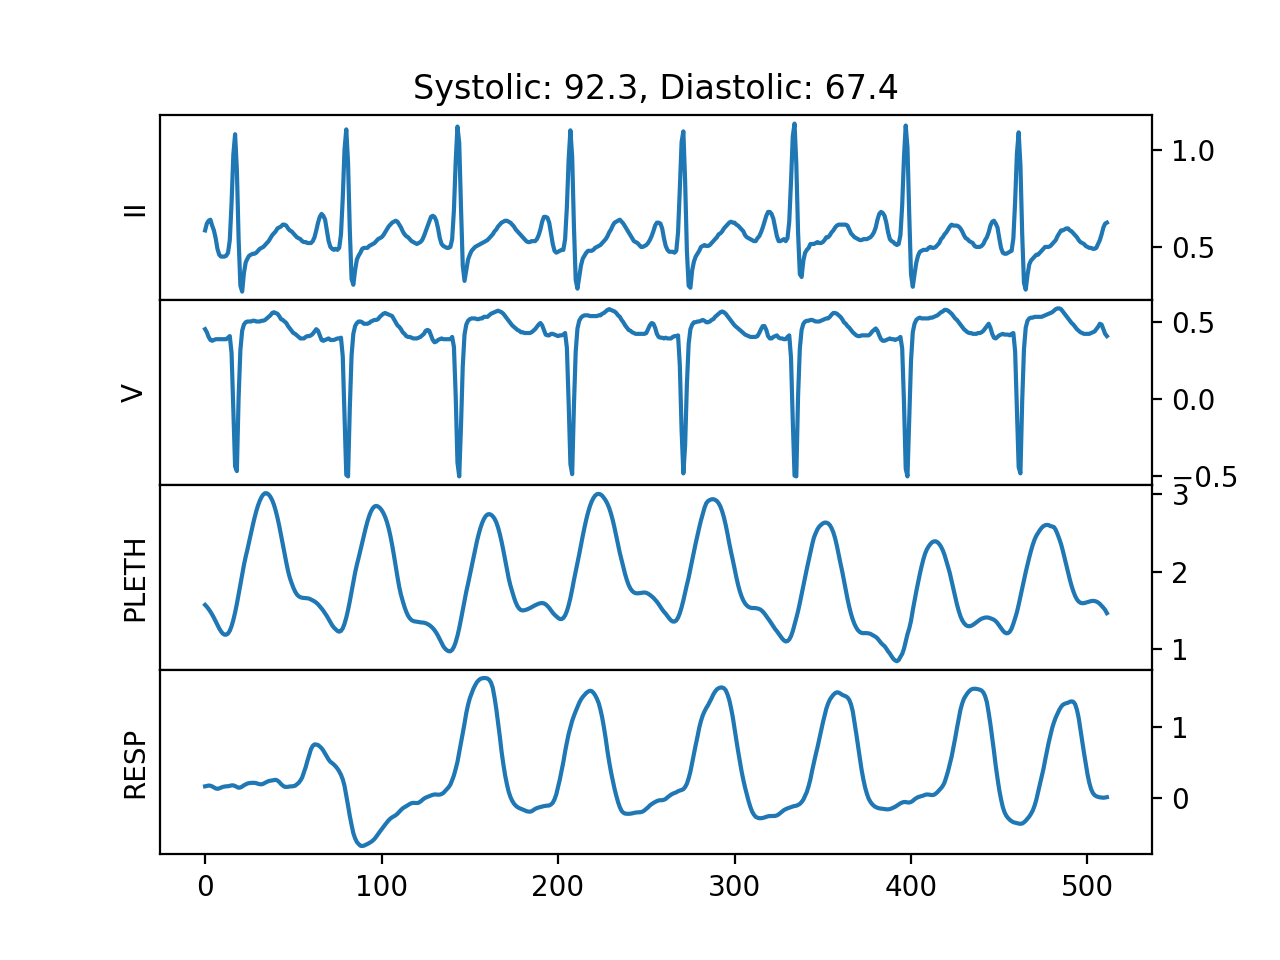

In [20]:
plot_batch_example(x, y, i=5)

In [1]:
import tensorflow as tf

In [5]:
data = tf.data.Dataset.from_tensor_slices([(i, i**2) for i in range(10)])

In [10]:
for i in data.take(20):
    print(i)

tf.Tensor([0 0], shape=(2,), dtype=int32)
tf.Tensor([1 1], shape=(2,), dtype=int32)
tf.Tensor([2 4], shape=(2,), dtype=int32)
tf.Tensor([3 9], shape=(2,), dtype=int32)
tf.Tensor([ 4 16], shape=(2,), dtype=int32)
tf.Tensor([ 5 25], shape=(2,), dtype=int32)
tf.Tensor([ 6 36], shape=(2,), dtype=int32)
tf.Tensor([ 7 49], shape=(2,), dtype=int32)
tf.Tensor([ 8 64], shape=(2,), dtype=int32)
tf.Tensor([ 9 81], shape=(2,), dtype=int32)
